<ipython-input-1-91f6ef0bdddd>:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  plot_img_np = np.fromstring(fig.canvas.tostring_rgb(),


KeyboardInterrupt: 

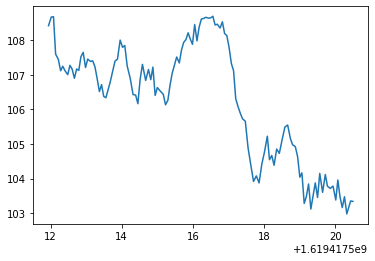

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import io
import time
# Camera stream
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_FPS, 60)
# Image crop
x, y, w, h = 800, 500, 100, 100
x, y, w, h = 950, 300, 100, 100
heartbeat_count = 128
heartbeat_values = [0]*heartbeat_count
heartbeat_times = [time.time()]*heartbeat_count
# Matplotlib graph surface
fig = plt.figure()
ax = fig.add_subplot(111)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    crop_img = img[y:y + h, x:x + w]
    # Update the data
    heartbeat_values = heartbeat_values[1:] + [np.average(crop_img)]
    heartbeat_times = heartbeat_times[1:] + [time.time()]
    # Draw matplotlib graph to numpy array
    ax.plot(heartbeat_times, heartbeat_values)
    fig.canvas.draw()
    plot_img_np = np.fromstring(fig.canvas.tostring_rgb(),
                                dtype=np.uint8, sep='')
    plot_img_np = plot_img_np.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.cla()
    # Display the frames
    cv2.imshow('Crop', crop_img)
    cv2.imshow('Graph', plot_img_np)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()